# Simple demo of energy storage env

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
%load_ext autoreload

In [3]:
%autoreload 2
from gridworld.agents.energy_storage import EnergyStorageEnv

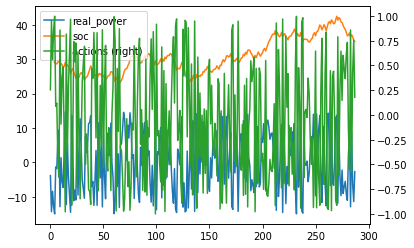

In [20]:
env = EnergyStorageEnv(name='ES', rescale_spaces=False)

state = env.reset()
done = False

power_history = []
soc_history = []
actions = []

while not done:
    act = env.action_space.sample()
    actions.append(act[0])
    state, reward, done, info = env.step(act)
    power_history.append(env.real_power)
    soc_history.append(state[0])

    
df = pd.DataFrame(
    data=np.array([actions, power_history, soc_history]).T,
    columns=["actions", "real_power", "soc"]
)

fig, ax = plt.subplots()
_ = df[["real_power", "soc"]].plot(ax=ax)
_ = df["actions"].plot(ax=ax, secondary_y=True, legend=True)